# Application 3: Iris Flower Species Identification 

In [1]:
from sklearn import datasets, preprocessing, metrics 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load iris dataset
features = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']
target = ['Class']
columns = [*features, *target]
data = pd.read_csv('iris.csv', header=None, names=columns)
data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# look for NaN values in each column
data.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Class                0
dtype: int64

In [4]:
data['Class'].value_counts() 

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

In [5]:
# PREPROCESSING
data['Class'] = data.Class.map({'Iris-versicolor' : 1, 'Iris-virginica' : 2, 'Iris-setosa': 3})

In [6]:
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
# Normalize features
X = min_max_scaler.fit_transform(X)
SIZE_TEST = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = SIZE_TEST)

In [8]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
sv_classifier = SVC()
classifiers.append(sv_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
dt_classifier = DecisionTreeClassifier()
classifiers.append(dt_classifier)
rf_classifier = RandomForestClassifier()
classifiers.append(rf_classifier)
xgb_classifier = XGBClassifier(eval_metric='logloss')
classifiers.append(xgb_classifier)

In [9]:
for classifier in classifiers:
    print(type(classifier))
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
    print("Precision:", metrics.precision_score(Y_test, y_pred, average='macro'))
    print("Recall:", metrics.recall_score(Y_test, y_pred, average='macro'))
    print("----")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.9111111111111111
Precision: 0.9215686274509803
Recall: 0.9215686274509803
----
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452
----
<class 'sklearn.svm._classes.SVC'>
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452
----
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452
----
<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452
----
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452
----
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803

## Decision Tree

In [10]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
dt_classifier.feature_importances_

array([0.        , 0.        , 0.07741822, 0.92258178])

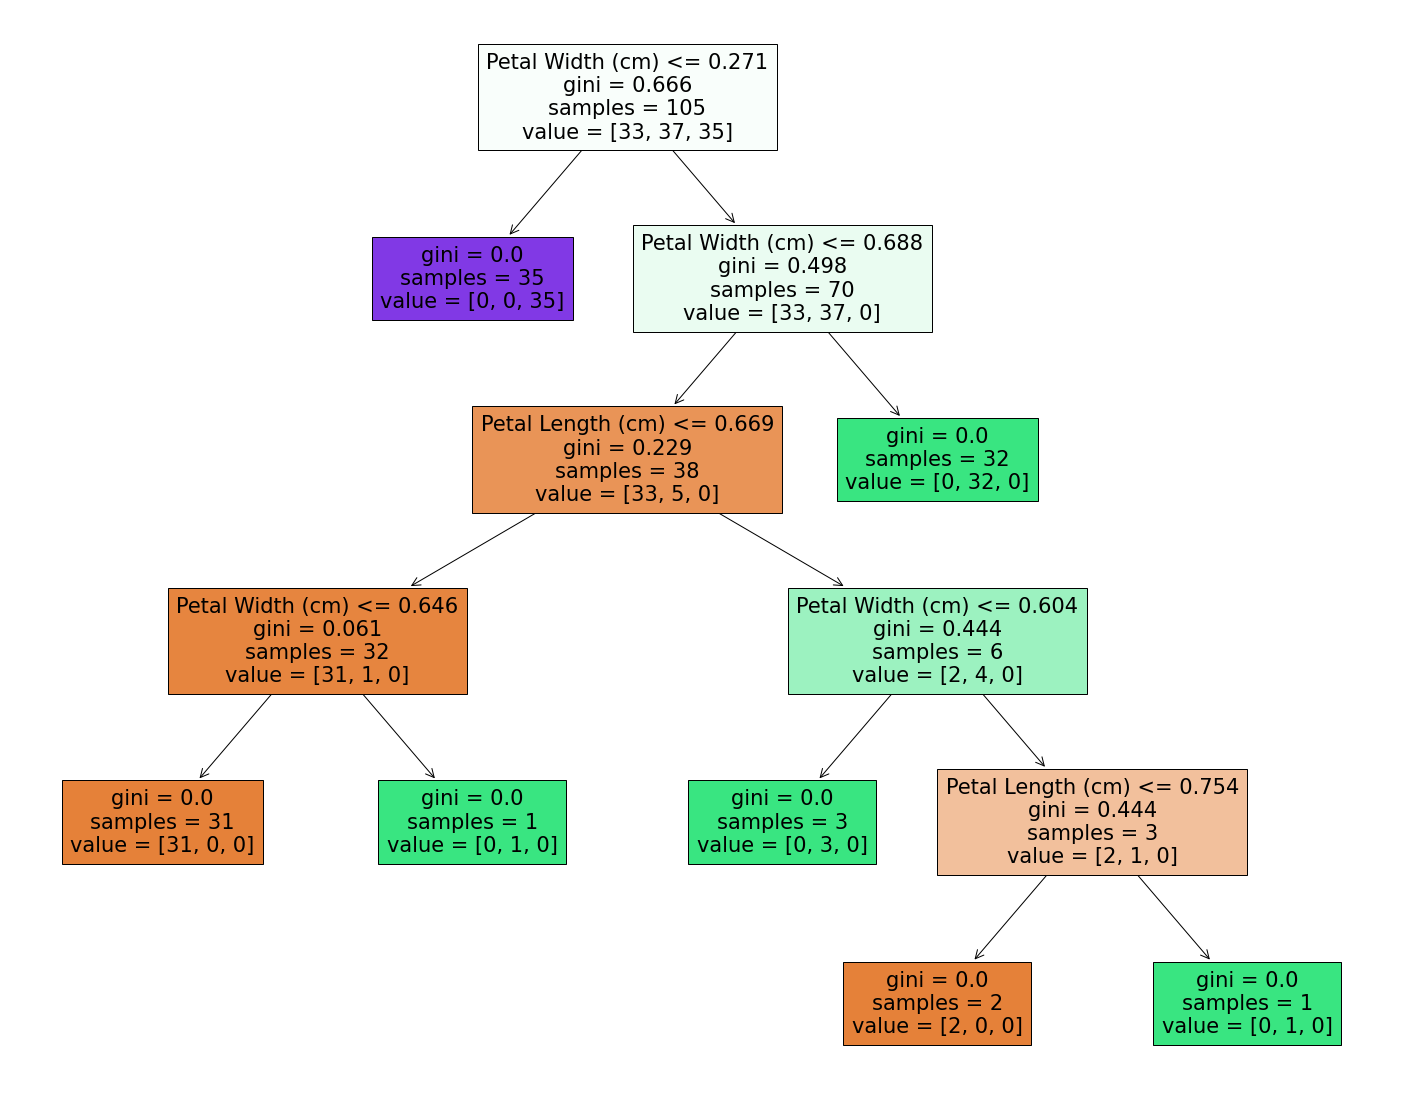

In [29]:
fig = plt.figure(figsize=(25,20))
plot_tree(dt_classifier, 
              feature_names = data.columns[0:-1],
              filled=True)
plt.show()

In [13]:
#fig.savefig("decision_tree.png")

## Random Forest

### Parameters

*n_estimators*
- The number of trees in the forest.

min_impurity_split : float, default=None
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

bootstrap : bool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

random_state : int, RandomState instance or None, default=None
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True)

oob_scorebool, default=False
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

n_jobsint, default=None
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.

warm_startbool, default=False
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.



#### Attributes

base_estimator_DecisionTreeClassifier
The child estimator template used to create the collection of fitted sub-estimators.

estimators_list of DecisionTreeClassifier
The collection of fitted sub-estimators.

classes_ndarray of shape (n_classes,) or a list of such arrays
The classes labels (single output problem), or a list of arrays of class labels (multi-output problem).

n_classes_int or list
The number of classes (single output problem), or a list containing the number of classes for each output (multi-output problem).

n_features_int
The number of features when fit is performed.

n_outputs_int
The number of outputs when fit is performed.

feature_importances_ndarray of shape (n_features,)
The impurity-based feature importances.

oob_score_float
Score of the training dataset obtained using an out-of-bag estimate. This attribute exists only when oob_score is True.

oob_decision_function_ndarray of shape (n_samples, n_classes)
Decision function computed with out-of-bag estimate on the training set. If n_estimators is small it might be possible that a data point was never left out during the bootstrap. 


In [14]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [17]:
y_pred = rf_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(Y_test, y_pred, average='macro'))

Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452


In [18]:
# Extract single tree
# estimator = rf_classifier.estimators_[0]

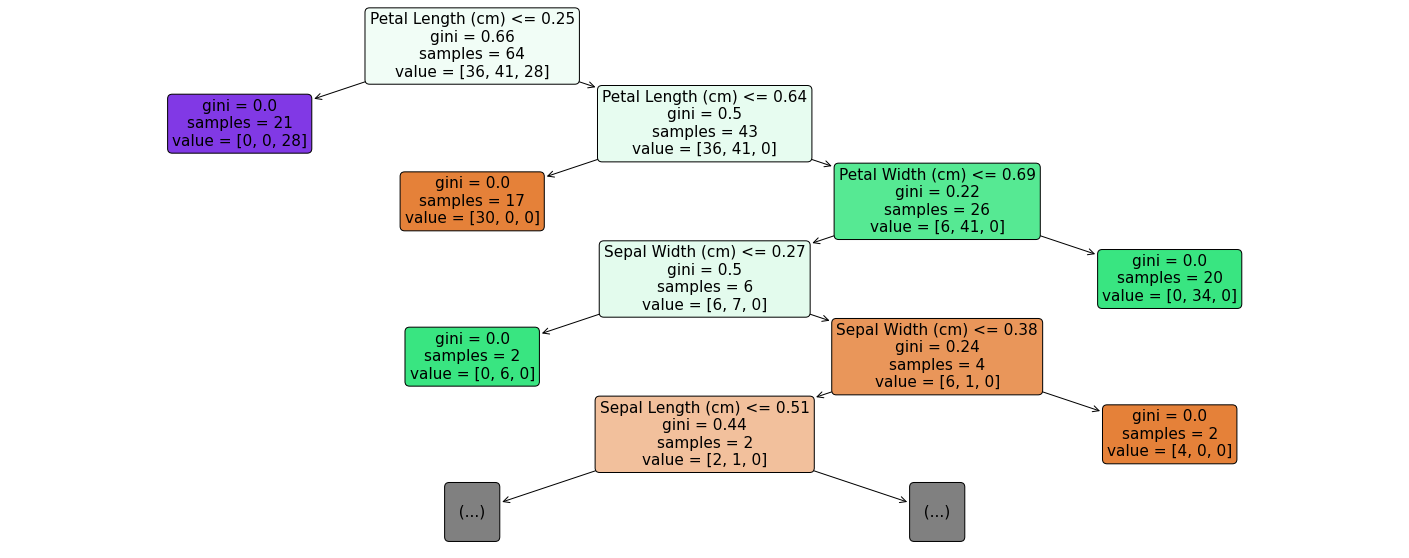

In [34]:
fig = plt.figure(figsize=(25,10))
plot_tree(rf_classifier.estimators_[0], 
                  max_depth = 5,
                  feature_names = data.columns[0:-1],
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()

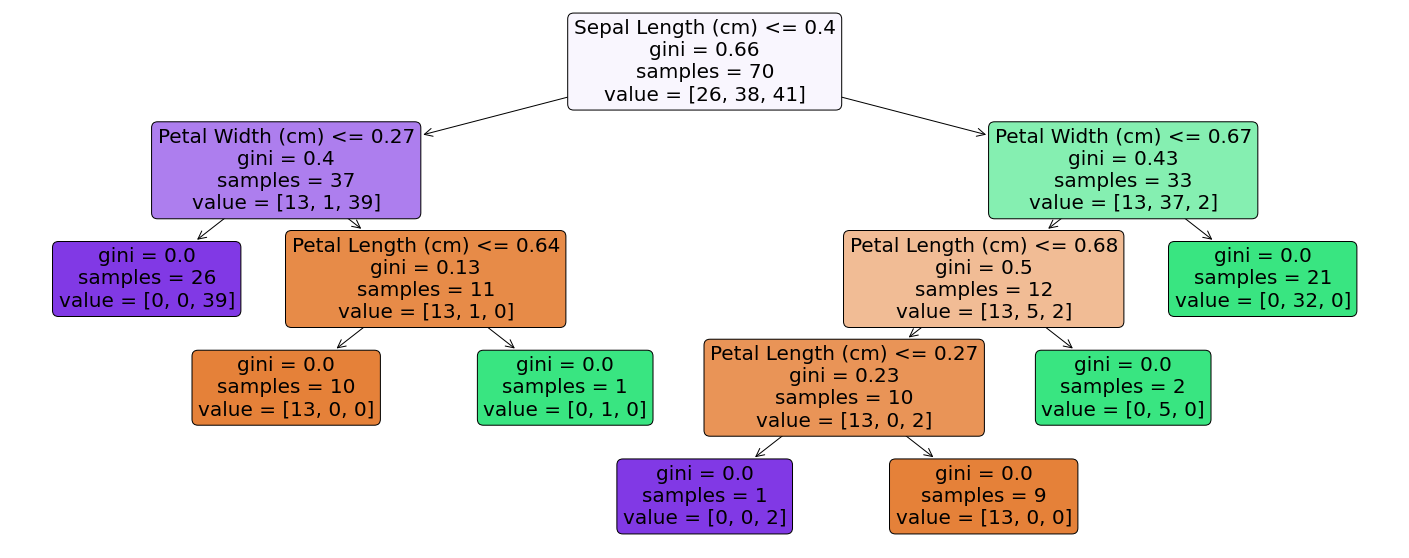

In [33]:
fig = plt.figure(figsize=(25,10))

plot_tree(rf_classifier.estimators_[1], 
                  max_depth = 5,
                  feature_names = data.columns[0:-1],
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()